### Reya Pillai

## To Explore Business Analytics

### Objective: To Perform Exploratory Data Analysis on the SampleSuperstore Dataset

Perform EDA to find weak areas of the business and work on them to make more profit.

###### 1.Import the necessary libraries and the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
store = pd.read_csv("C:/Users/Reya/Desktop/TSF Internship/SampleSuperstore.csv")

###### 2. Find the details of the dataset

In [6]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
store.shape

(9994, 13)

* There are 9994 columns and 13 rows in this dataset

* These are the names of the columns in the dataset

In [9]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

* Find the number and names of unique values in each column of the dataset.

In [10]:
store.nunique(axis =0)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

* Find the names of unique values in categorical columns

In [18]:
ship_mode = store['Ship Mode'].unique()
city = store['City'].unique()
state =  store['State'].unique()
reg = store['Region'].unique()
cat = store['Category'].unique()
sub_cat = store['Sub-Category'].unique()

In [22]:
print("Ship Mode", ship_mode, "\n")
print("City", city, "\n")
print("State", state, "\n")
print("Region", reg, "\n")
print("Categories", cat, "\n")
print("Sub-Categories", sub_cat)

Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

City ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Bellevill

* Summarize the numerical data 

In [23]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


###### 3. Clean the Data

* Check for missing values

In [27]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

* Check for duplicates

In [50]:
store.duplicated().sum()

17

* Since there are only 17 duplicated entries from 9994 rows, we can drop them.

In [51]:
store.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


* Now the shape of our dataset is (9977, 13)

* We can remove the columns that are not useful to us. For eg, the Country column has only one value so we can remove it.
* The postal code is also irrelevant so we can remove that as well.

In [55]:
store = store.drop(['Country', 'Postal Code'], axis =1)

###### 4. Analyse the Relationship between the columns of the dataset

In [56]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


* Use the correlation matrix and plot it visually 

In [59]:
correlation = store.corr()
correlation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


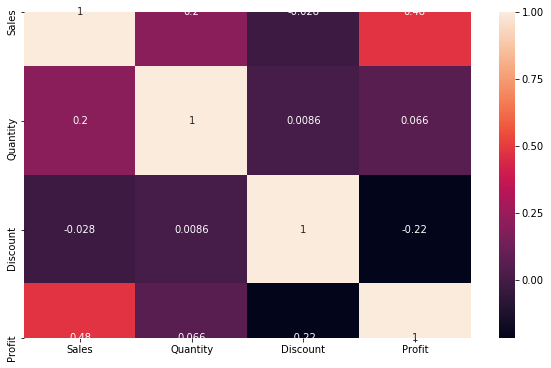

In [66]:
plt.figure(figsize = (10,6))
sns.heatmap(correlation, annot = True)

* As we can see in the heatmap, there is a positive correlation between Sales and Profit, Sales and quantity and a negative correlation between Profit and Discount.

###### 5. Visualize the Dataset

* We can then create a pairplot to plot scatter plots with every feature.

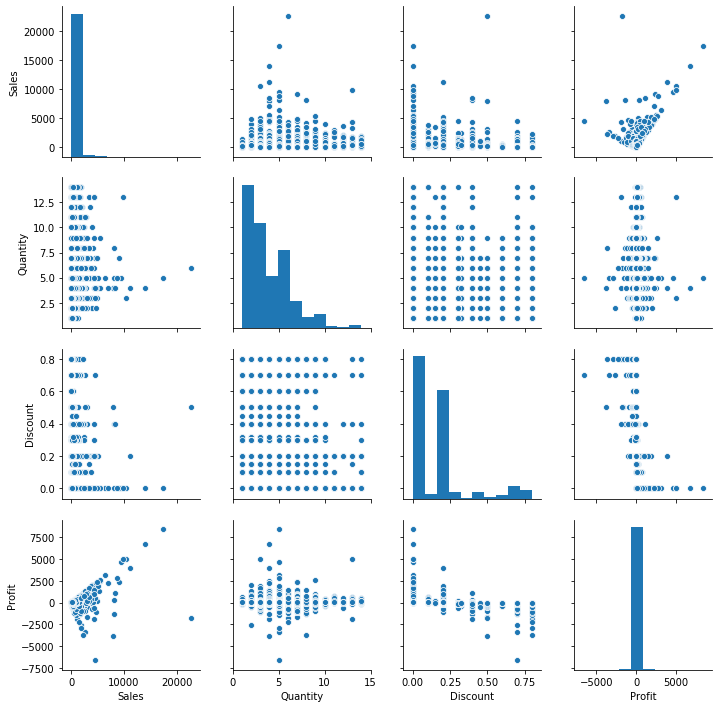

In [67]:
sns.pairplot(store)

* Visualize the distribution in <b> different cities. </b>

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Elyria             1
Montebello         1
Lake Elsinore      1
Rock Hill          1
Conroe             1
Name: City, Length: 531, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

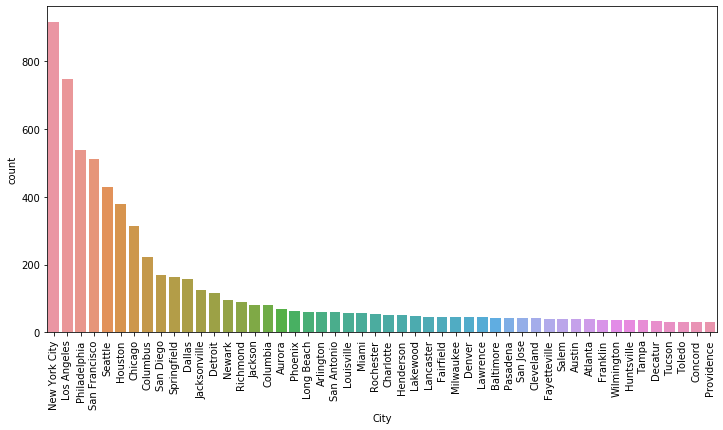

In [70]:
print (store['City'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=store['City'], order=(store['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

From this we can see that the highest number of sales is from New York City which makes sense since it is a busy city and there are many people there.

* Visualize the distribution of <b> different sub categories. </b>

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

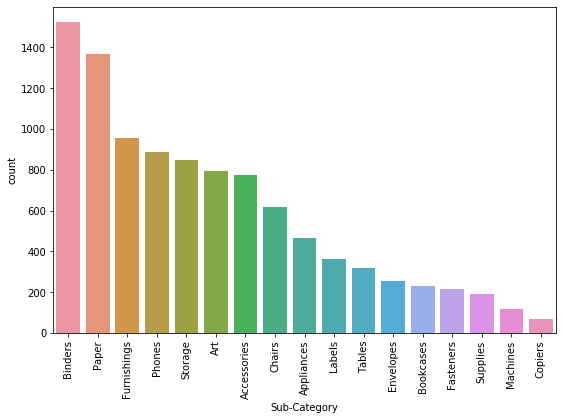

In [75]:
print (store['Sub-Category'].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x=store['Sub-Category'], order=(store['Sub-Category'].value_counts().head(50)).index)
plt.xticks(rotation=90)

* From this we can see that "Binders" are the ones that have the most sales.

Let us create a pie plot of the columns that we have not visualized yet. 
* This is the pie plot for the categories column

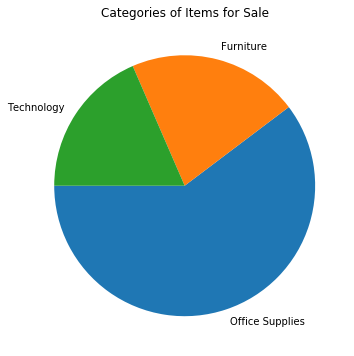

In [76]:
plt.figure(figsize=(12,6))
plt.pie(store['Category'].value_counts(), labels=store['Category'].value_counts().index, startangle=180, radius=1)
plt.title('Categories of Items for Sale')
plt.show()

* This is the pie plot for Segments

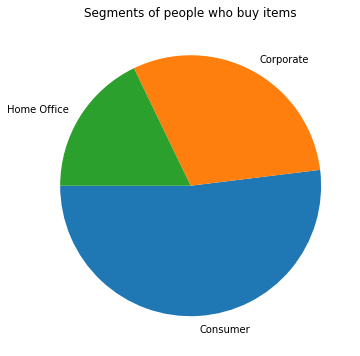

In [77]:
plt.figure(figsize=(12,6))
plt.pie(store['Segment'].value_counts(), labels=store['Segment'].value_counts().index, startangle=180, radius=1)
plt.title('Segments of people who buy items')
plt.show()

* This is the pie plot of Regions

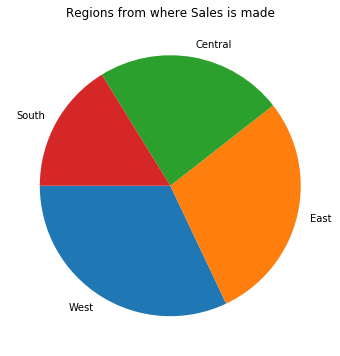

In [78]:
plt.figure(figsize=(12,6))
plt.pie(store['Region'].value_counts(), labels=store['Region'].value_counts().index, startangle=180, radius=1)
plt.title('Regions from where Sales is made')
plt.show()

###### 6. Comparing profits to each feature

* Affect on Profit w.r.t Sub category

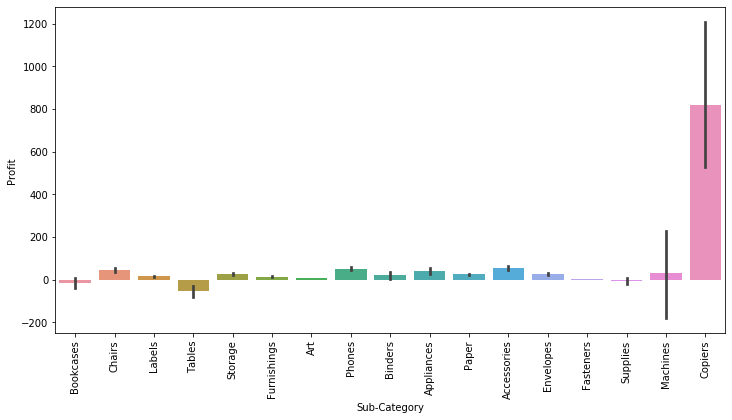

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x=store['Sub-Category'], y=store['Profit'])
plt.xticks(rotation=90)
plt.show()

* From this we can see that the most profit is obtained from Copiers. To Increase overall profit, increase the sales of <b>Tables </b>

* Affect on profit w.r.t Region

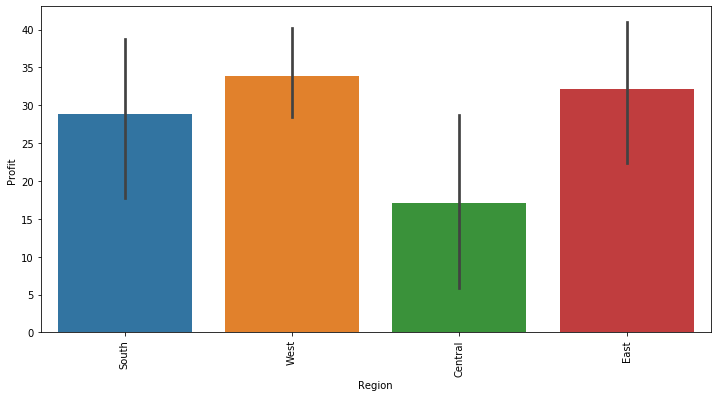

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(x=store['Region'], y=store['Profit'])
plt.xticks(rotation=90)
plt.show()

* From this we can see that the maximum profit is from the West Region of the US. To improve profit, increase the sales in Central and South Regions of the US.

###### 7. Combining all the results of EDA

* The Dataset describes the sales data from the Country of The United States.
* There is a positive correlation between Sales and Profit, Sales and quantity.
* There is a negative correlation between Profit and Discount.
* The highest number of sales is from New York City.
* "Binders" is the item that has the most sales.
* The most profit is obtained from Copiers. To Increase overall profit, increase the sales of Tables.
* The maximum profit is from the West Region of the US. To improve profit, increase the sales in Central and South Regions of the US.